## Import libraries

In [1]:
import sys
import matplotlib.pyplot as plt
from matplotlib import patches
from skimage import data
from skimage.feature import Cascade

## Utility functions

In [2]:
def show_detected_face(image, detected):
    '''takes an image and draw red rectangles around detected face'''
    plt.imshow(image)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.axis('off')
    
    for patch in detected:
        img_desc.add_patch(patches.Rectangle((patch['c'], patch['r']),
                                             patch['width'], patch['height'],
                                             fill=False, color='r', linewidth=2))
    plt.show()

In [3]:
def save_detected_face(image, detected):
    '''takes an image and draw red rectangles around detected face and saves the file'''
    plt.imshow(image)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.axis('off')
    
    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle((patch['c'], patch['r']), 
                              patch['width'], patch['height'], 
                              fill=False, color='r', linewidth=2))
        
    save_img_name = 'detected_faces.jpg'
    plt.savefig(save_img_name, bbox_inches='tight', pad_inches=0)
    print('Image saved as', save_img_name)

## Read image

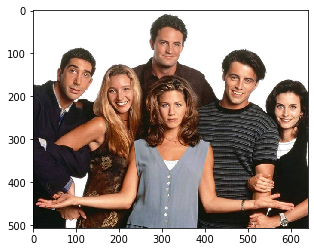

In [7]:
# read image
image = plt.imread('friends.jpg')

# show image
plt.imshow(image)

## Detect faces

In [8]:
# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()

In [9]:
# Initialize the detector cascade.
detector = Cascade(trained_file)

In [10]:
# Apply detector on the image
detected = detector.detect_multi_scale(img=image,
                                       scale_factor=1.2, step_ratio=1,
                                       min_size=(10, 10), max_size=(200, 200))

In [14]:
# No. of faces detected
print('No. of faces detected :', len(detected))

No. of faces detected : 6


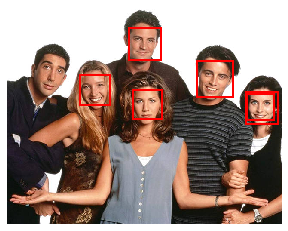

In [15]:
# Show image with detected face marked
show_detected_face(image, detected)

In [16]:
# show patches
for face in detected:
    print(face)

{'r': 199, 'c': 556, 'width': 75, 'height': 75}
{'r': 195, 'c': 292, 'width': 68, 'height': 68}
{'r': 50, 'c': 284, 'width': 74, 'height': 74}
{'r': 203, 'c': 559, 'width': 62, 'height': 62}
{'r': 128, 'c': 442, 'width': 83, 'height': 83}
{'r': 159, 'c': 169, 'width': 70, 'height': 70}


Image saved as detected_faces.jpg


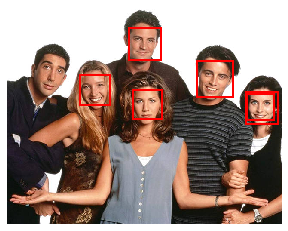

In [17]:
# Save image with detected face marked
save_detected_face(image, detected)